In [24]:
import numpy as np
import pandas as pd
from dowhy import CausalModel

In [25]:
N = 1000

k1 = 0.5
k2 = 1.5
k3 = 0.7
k4 = 2.0

s = 0.3

x1 = np.random.normal(loc=0, scale=s, size=N)
x2 = k1 * x1 + np.random.normal(loc=0, scale=s, size=N)
x3 = k2 * x2 + np.random.normal(loc=0, scale=s, size=N)
x4 = k3 * x3 + k4 * x1 + np.random.normal(loc=0, scale=s, size=N)

In [26]:
df = pd.DataFrame(data=np.stack([x1, x2, x3, x4], axis=1), columns=["X1", "X2", "X3", "X4"])

In [27]:
gml_graph = """
graph [
    directed 1
    
    node [
        id "X1"
        label "X1"
    ]
    node [
        id "X2"
        label "X2"
    ]
    node [
        id "X3"
        label "X3"
    ]
    node [
        id "X4"
        label "X4"
    ]

    edge [
        source "X1"
        target "X2"
    ]
    edge [
        source "X2"
        target "X3"
    ]
    edge [
        source "X3"
        target "X4"
    ]
    edge [
        source "X1"
        target "X4"
    ]
]
"""

In [28]:
model = CausalModel(
    data=df,
    treatment="X2",
    outcome="X4",
    graph=gml_graph
)

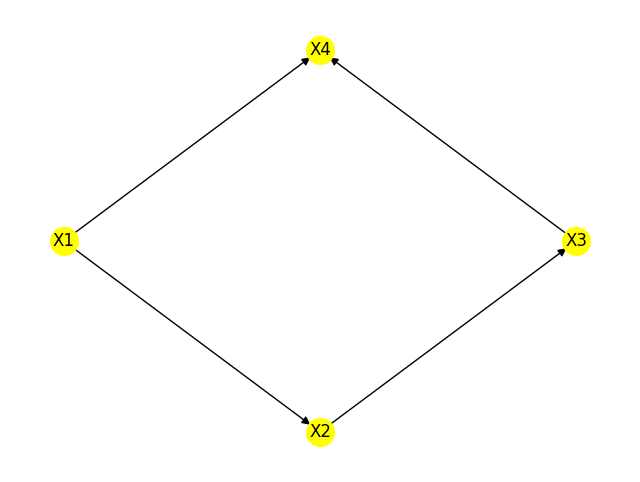

In [29]:
model.view_model()

In [30]:
estimand = model.identify_effect()

print(estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d            
─────(E[X4|X1])
d[X₂]          
Estimand assumption 1, Unconfoundedness: If U→{X2} and U→X4 then P(X4|X2,X1,U) = P(X4|X2,X1)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d         d        ⎤
E⎢─────(X₄)⋅─────([X₃])⎥
 ⎣d[X₃]     d[X₂]      ⎦
Estimand assumption 1, Full-mediation: X3 intercepts (blocks) all directed paths from X2 to X,4.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X2} and U→{X3} then P(X3|X2,U) = P(X3|X2)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{X3} and U→X4 then P(X4|X3, X2, U) = P(X4|X3, X2)



In [31]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='frontdoor.two_stage_regression'
)

estimate.value

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': None, 'second_stage_model': None}
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': None, 'second_stage_model': None}


/opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
